# Hacettepe University
### BBM 409 2st ASSIGNMENT


#### Name and Surname: Fatih Pehlivan – Göktuğ Ocaklıoğlu
#### Identity Number: 21946529 - 2200356841
#### Course:  BBM 409

#### Advisor: Burçak Asal

In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
import matplotlib.pyplot as plt

#### Custom Dictionary Functions

In [112]:
def addOrUpdateDict(dict, key):
    """
    if dictionary contains the key increase the value 1
    else create new key and make the value 1
    :param dict: is a dictionary (such as sports_dict, politics_dict...)
    :param key: is a word
    """
    
    if key in dict.keys():
        dict.update({key: dict.get(key) + 1})
    else:
        dict[key] = 1


def fillDicts(dict, array):
    """
    add to dictionary all words in the array
    :param dict: is a dictionary (such as sports_dict, politics_dict...)
    :param array: is a list words
    """

    for element in array:
        addOrUpdateDict(dict, element)


def resetDicts(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict):
    """
    resets all dictionaries
    :param sport_dict: sport dictionary
    :param business_dict: business dictionary
    :param politics_dict: politics dictionary
    :param entertainment_dict: entertainment dictionary
    :param tech_dict: tech dictionary
    """

    sport_dict.clear()
    business_dict.clear()
    politics_dict.clear()
    entertainment_dict.clear()
    tech_dict.clear()


def filterSentences(listOfWords):
    """
    remove stopwords
    :param listOfWords: is a list of word
    :return: a list without stopwords
    """

    stop_words = set(stopwords.words('english'))
    stop_words.add("said")
    filtered_sentence = [w for w in listOfWords if w not in stop_words]
    return filtered_sentence


def makeBigramOrUnigram(sentence, bigram):
    """
    make the array bigram or unigram
    :param sentence: is a list of words
    :param bigram: is boolean value. if it is true make bigram
    :return: a bigram or unigram list
    """

    if bigram:
        filtered_sentence = [(sentence[w - 1] + " " + sentence[w]) for w in
                             range(1, len(sentence))]

    # all sentences are already bigram don't need to change it
    else:
        filtered_sentence = sentence
    return filtered_sentence


def initializeDicts(data_array, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, bigram,stopWordsWillBeRemoved=False):
    """
    make Bag Of Words
    :param data_array: our data array which contains text and categories
    :param sport_dict: sport dictionary
    :param business_dict: business dictionary
    :param politics_dict: politics dictionary
    :param entertainment_dict: entertainment dictionary
    :param tech_dict: tech dictionary
    :param bigram: is a boolean value to make bigram or unigram
    :param stopWordsWillBeRemoved: is a boolean value to remove stop words from text
    :return:
    """

    # https://stackoverflow.com/questions/41610543/corpora-stopwords-not-found-when-import-nltk-library
    # If there is "Resource stopwords not found" error, you should download below.
    # nltk.download('stopwords')
    # https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

    for i in data_array:
        # remove punctuation from array to make more semantic
        i[0] = i[0].translate(str.maketrans({key: " " for key in string.punctuation + "£$"}))
        listOfWords = word_tokenize(i[0].lower())

        # remove elements which length is less than 2 to make more semantic
        listOfSemanticWords = [ele for ele in listOfWords if len(ele) > 2]
        if stopWordsWillBeRemoved:
            sentence = filterSentences(listOfSemanticWords)
        else: sentence = listOfSemanticWords
        filtered_sentence = makeBigramOrUnigram(sentence, bigram)

        if i[1] == "sport":
            fillDicts(sport_dict, filtered_sentence)
        elif i[1] == "business":
            fillDicts(business_dict, filtered_sentence)
        elif i[1] == "politics":
            fillDicts(politics_dict, filtered_sentence)
        elif i[1] == "entertainment":
            fillDicts(entertainment_dict, filtered_sentence)
        elif i[1] == "tech":
            fillDicts(tech_dict, filtered_sentence)
def numberOfUniqueWords(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict):
    """
    This function calculate number of unique words
    :param dicionaries: key values are words
    :return: number of unique words
    """

    return len(set(sport_dict.keys()) | set(business_dict.keys()) | set(politics_dict.keys()) | set(
        entertainment_dict.keys()) | set(tech_dict.keys()))



In [113]:
#### Draw Pie Graph Functions

In [114]:
def drawGraph(dict, result, dataarray):

    # https://www.geeksforgeeks.org/python-program-to-find-the-highest-3-values-in-a-dictionary/
    # Found most common 10 words and their number of uses
    dict_ten = Counter(dict)
    dict_ten = dict_ten.most_common(10)


    # https://stackoverflow.com/questions/62593913/plotting-a-pie-chart-out-of-a-dictionary
    labels = []
    sizes = []

    for x, y in dict_ten:
        labels.append(x)
        sizes.append(y)

    # Plot and explode most common 3 words
    plt.pie(sizes, explode=[0.2 if n < 3 else 0 for n in range(10)], labels=labels, autopct='%1.2f%%', shadow=True)
    plt.title(f"Most Common 10 words in {result}")

    plt.axis('equal')
    plt.show()
    print(f"For {result} Text Most Common 3 Words:")

    for i, j in dict_ten[:3]:
        statistic = 0
        count = 0
        for k in dataarray:
            if k[1] == result:
                count+=1
                if i in k[0]:
                    statistic += 1
        print("Word:", i, "Number of word:", j, "Statistic is:", (statistic/count))


In [115]:
# Part 0

In [116]:
# Read the data with pandas
data = pd.read_csv("English Dataset.csv")

# Print first 5 elements
data.head()

# Put elements in numpy array except ID
data_array = data.to_numpy()[::, 1::]

# shuffle the array
np.random.shuffle(data_array)

data_array

array([['bosvelt optimistic over new deal manchester city s paul bosvelt will find out  within a month  whether he is to be offered a new one-year deal.  the 34-year-old dutch midfielder is out of contract in the summer and  although his age may count against him  he feels he can play on for another season.  i told the club i would like to stay for one more year. they promised me an answer within the next month so i am waiting to see   he said.  the main concern is my age but i think i have proved i am fit enough. bosvelt joined city from feyenoord in 2003 and at first he struggled to adapt to life in england. but his professionalism and dedication impressed manager kevin keegan.  he realised the pace of the game was faster than anything he was used to but he drove himself back into the team. he is an unsung hero   said keegan.',
        'sport'],
       ['wi-fi web reaches farmers in peru a network of community computer centres  linked by wireless technology  is providing a helping ha

# Part1

In this part we determine 3 most common words for each categories. We remove stop words from dataset.
By drawing a pie chart, we showed the number of quantity of these 3 words used and the frequency of these words in the relevant category.

In [117]:
sport_dict = {}
business_dict = {}
politics_dict = {}
entertainment_dict = {}
tech_dict = {}

# initialize dictionaries with the data set and by removing stopwords
initializeDicts(data_array, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, False, True)
# draw pie graphs for most common 10 words and explode most 3 words

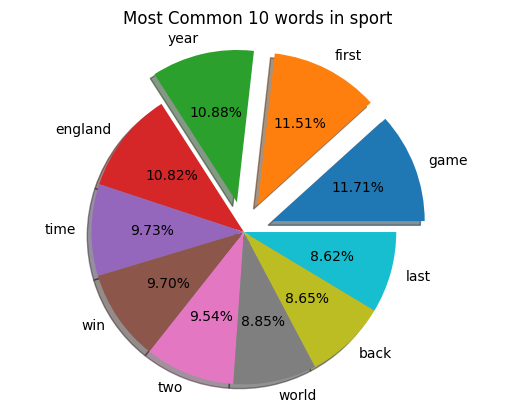

For sport Text Most Common 3 Words:
Word: game Number of word: 356 Statistic is: 0.546242774566474
Word: first Number of word: 350 Statistic is: 0.49421965317919075
Word: year Number of word: 331 Statistic is: 0.6242774566473989


In [118]:
drawGraph(sport_dict, "sport", data_array)

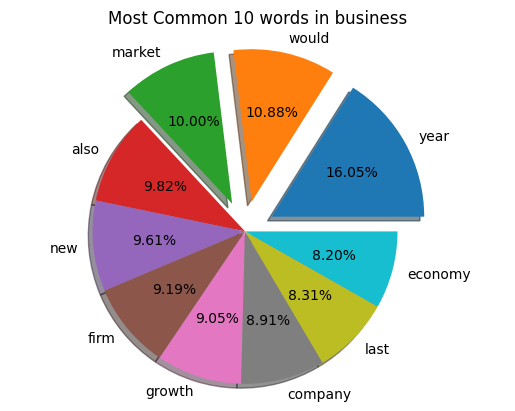

For business Text Most Common 3 Words:
Word: year Number of word: 456 Statistic is: 0.7351190476190477
Word: would Number of word: 309 Statistic is: 0.5267857142857143
Word: market Number of word: 284 Statistic is: 0.5


In [119]:
drawGraph(business_dict, "business", data_array)

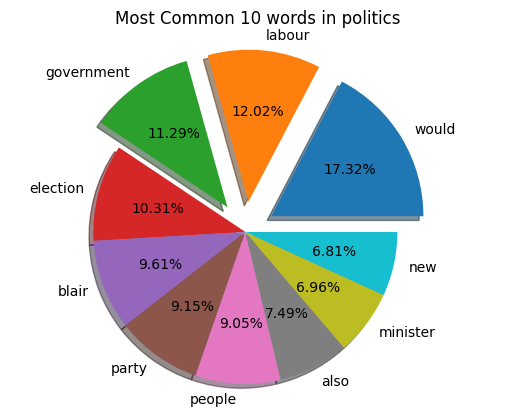

For politics Text Most Common 3 Words:
Word: would Number of word: 712 Statistic is: 0.8248175182481752
Word: labour Number of word: 494 Statistic is: 0.5
Word: government Number of word: 464 Statistic is: 0.6715328467153284


In [120]:
drawGraph(politics_dict, "politics", data_array)

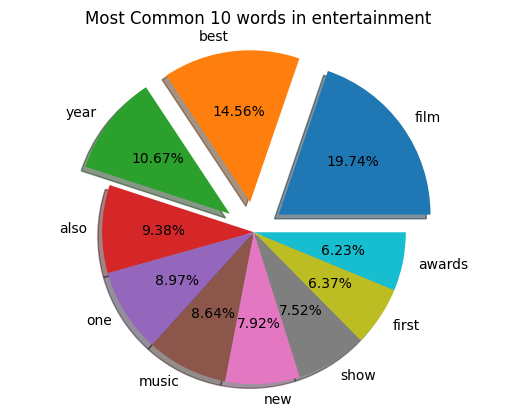

For entertainment Text Most Common 3 Words:
Word: film Number of word: 583 Statistic is: 0.5347985347985348
Word: best Number of word: 430 Statistic is: 0.38461538461538464
Word: year Number of word: 315 Statistic is: 0.7619047619047619


In [121]:
drawGraph(entertainment_dict, "entertainment", data_array)

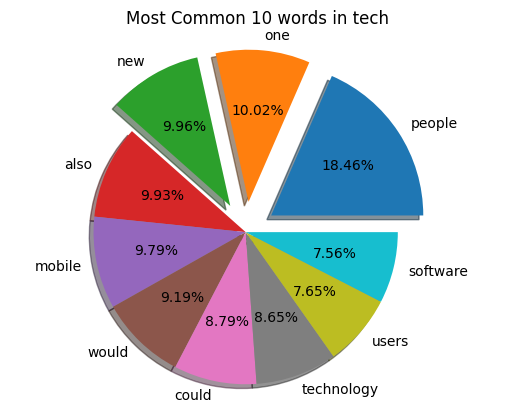

For tech Text Most Common 3 Words:
Word: people Number of word: 647 Statistic is: 0.7432950191570882
Word: one Number of word: 351 Statistic is: 0.8888888888888888
Word: new Number of word: 349 Statistic is: 0.7471264367816092


In [122]:
drawGraph(tech_dict, "tech", data_array)

In general, these 3 words give results related to their category.

After removing the stop words, listed top 10 words and explode top 3 words

# Part 2

We will represent our data with listed approaches and use them to learn a classifier via Naive Bayes algorithm. we implement our own Naive Bayes algorithm by using Bag of words.

In [123]:
def totals(smooth=0):
    """
    calculate Laplacian smoothing for all categories
    :param smooth: smooth is an integer value to increase denominator
    :return: a list calculates denominator sport, business, politics, entertainment and tech in order
    """


    return [sum(sport_dict.values()) + smooth, sum(business_dict.values()) + smooth,
            sum(politics_dict.values()) + smooth, sum(entertainment_dict.values()) + smooth, sum(
            tech_dict.values()) + smooth]


def probabilityCategory(y_train):
    """
    calculate log probability of a category P(sport), P(business) etc.
    :param y_train:
    :return: list of log probability
    """

    countTrainCategories = np.zeros(5, dtype=int)

    for i in y_train:
        if i == "sport":
            countTrainCategories[0] += 1
        elif i == "business":
            countTrainCategories[1] += 1
        elif i == "politics":
            countTrainCategories[2] += 1
        elif i == "entertainment":
            countTrainCategories[3] += 1
        elif i == "tech":
            countTrainCategories[4] += 1
        else:
            "ERROR"
    return np.log(countTrainCategories / len(y_train))

def noSmooth(dict_total, filtered_sentence):
    """
    Generally we need to smooth. However, sometimes we may not need it. Revert the smoothing
    :param dict_total:
    :param filtered_sentence:
    :return: list of probability and a boolean value for the numerator
    """

    count = 0
    bool = False
    for j in filtered_sentence:
        if j in sport_dict.keys():
            count += 1
        if j in business_dict.keys():
            count += 1
        if j in politics_dict.keys():
            count += 1
        if j in entertainment_dict.keys():
            count += 1
        if j in tech_dict.keys():
            count += 1
    if count == len(dict_total):
        dict_total = totals()
        bool = True
    return dict_total, bool


def calculateYPredict(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, countTrainCategories,
                      dict_total, bigram=False):
    """
    this function calculate y predict.
    :param sport_dict: sport dictionary
    :param business_dict: business dictionary
    :param politics_dict: politics dictionary
    :param entertainment_dict: entertainment dictionary
    :param tech_dict: tech dictionary
    :param countTrainCategories: log probability list for each categories
    :param dict_total: denominator list for each categories
    :param bigram: determine bigram or unigram
    :return: predicted list and dataframe for visualization
    """

    y_predict = []
    data_frame = np.zeros((len(X_test),5))
    count = 0
    for i in X_test:
        # replace punctuation to whitespace from the text, because we need to get meaningful elements from text
        i = i.translate(str.maketrans({key: " " for key in string.punctuation + "£$"}))

        # make an array from text
        i = filterSentences(word_tokenize(i.lower()))

        # make bigram or unigram given list
        filtered_sentence = makeBigramOrUnigram(i, bigram)

        # recalculate we don't need laplacian smoothing
        dict_total, makeNumeratorZero = noSmooth(dict_total, filtered_sentence)

        # add log probabilities in make predict list
        makePredict = np.copy(countTrainCategories)
        for j in filtered_sentence:

            # if there is laplacian smoothing we add one, else we don't need
            if makeNumeratorZero:
                countPredictCategories = np.zeros(5, dtype=int)
            else:
                countPredictCategories = np.ones(5, dtype=int)
            if j in sport_dict.keys():
                countPredictCategories[0] += sport_dict.get(j)
            if j in business_dict.keys():
                countPredictCategories[1] += business_dict.get(j)
            if j in politics_dict.keys():
                countPredictCategories[2] += politics_dict.get(j)
            if j in entertainment_dict.keys():
                countPredictCategories[3] += entertainment_dict.get(j)
            if j in tech_dict.keys():
                countPredictCategories[4] += tech_dict.get(j)

            # Calculate log probability for the given text for each categories
            for k in range(len(makePredict)):
                makePredict[k] += math.log(countPredictCategories[k] / dict_total[k])
        # make predict consists of negative numbers we need to put them all between 0 and 1
        makePredict = makePredict / np.sum(makePredict)

        # however, smaller numbers give higher probabilities due to the above operation. We need to reverse them
        makePredict = 100 / makePredict

        # again make them between 0 and 1
        makePredict /= np.sum(makePredict)

        data_frame[count] = np.copy(makePredict)

        # find the highest probability
        index = makePredict.argmax()

        # add in the predicted list
        if index == 0:
            y_predict.append("sport")
        elif index == 1:
            y_predict.append("business")
        elif index == 2:
            y_predict.append("politics")
        elif index == 3:
            y_predict.append("entertainment")
        elif index == 4:
            y_predict.append("tech")
        count += 1
    df = pd.DataFrame(data_frame, columns=["Sport", "Business", "Politics", "Entertainment", "Tech"])
    df = pd.concat([df, pd.DataFrame(y_test, columns=["Actual"])], axis=1)
    return y_predict, df

In [124]:
# split the data train and test valur (%80 train, %20 test)
X_train, X_test, y_train, y_test = train_test_split(data_array[:, 0], data_array[:, 1], test_size=0.2)

# merge the train data for my custom function (initializeDicts)
train_data = np.array((X_train, y_train), order='F').T

In [125]:
# UNIGRAM

# reset the dictionaries for reusing
resetDicts(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict)

# initialize dictionaries with the train set with unigram words.
initializeDicts(train_data, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, False)

# determine number of unique words for laplacian smoothing
word_set_number = numberOfUniqueWords(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict)

# make smoothing
dict_total = totals(word_set_number)

# calculate log probabilities for each categories
countTrainCategories = probabilityCategory(y_train)

# make predict
y_predict, df = calculateYPredict(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict,
                              countTrainCategories, dict_total)

print(accuracy_score(y_test, y_predict))

# visualize my prediction with their probabilities
df

0.9731543624161074


,Sport,Business,Politics,Entertainment,Tech,Actual
0,0.208959,0.195692,0.194879,0.208954,0.191516,sport
1,0.193099,0.210609,0.198581,0.198238,0.199473,business
2,0.226759,0.190441,0.191816,0.197671,0.193312,sport
3,0.196982,0.193278,0.196128,0.219407,0.194205,entertainment
4,0.188007,0.205122,0.220705,0.192188,0.193977,politics
...,...,...,...,...,...,...
293,0.192488,0.202683,0.195964,0.196843,0.212021,tech
294,0.197162,0.193418,0.197735,0.219549,0.192137,entertainment
295,0.191160,0.212898,0.198437,0.196614,0.200891,business
296,0.216242,0.193492,0.195311,0.200915,0.194040,sport


In [126]:
# BIGRAM

# reset the dictionaries for reusing
resetDicts(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict)

# initialize dictionaries with the train set with bigram words.
initializeDicts(train_data, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, True)

# determine number of unique words for laplacian smoothing
word_set_number = numberOfUniqueWords(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict)

# make smoothing
dict_total = totals(word_set_number)

# calculate log probabilities for each categories
countTrainCategories = probabilityCategory(y_train)

# make predict
y_predict, df = calculateYPredict(sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict,
                              countTrainCategories, dict_total, True)

print(accuracy_score(y_test, y_predict))

# visualize my prediction with their probabilities
df

0.9228187919463087


,Sport,Business,Politics,Entertainment,Tech,Actual
0,0.202059,0.199431,0.199106,0.200747,0.198657,sport
1,0.199378,0.202226,0.199357,0.199851,0.199188,business
2,0.201778,0.199743,0.199339,0.200207,0.198933,sport
3,0.199623,0.199645,0.199304,0.202931,0.198497,entertainment
4,0.198503,0.199934,0.204170,0.199155,0.198238,politics
...,...,...,...,...,...,...
293,0.199927,0.200133,0.199312,0.200199,0.200429,tech
294,0.198507,0.198403,0.197851,0.207731,0.197509,entertainment
295,0.199125,0.202647,0.199292,0.200068,0.198868,business
296,0.202814,0.199641,0.199108,0.200040,0.198397,sport


Unigram gives a better result because bigram makes more specific our prediction. However, in machine learning, we do more general things when the prediction

# Part 3

#### Unigram with stop-words

In [127]:
resetDicts(sport_dict,business_dict,politics_dict,entertainment_dict,tech_dict)

In [128]:
initializeDicts(train_data, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, False)

In [129]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [130]:
def makestr(dict):
    str = ""
    for i, j in dict.items():
        i = i + " "
        str += j*i
    return str

In [131]:
#Transform a count matrix to a normalized tf or tf-idf representation.
corpus = [makestr(sport_dict), makestr(business_dict), makestr(politics_dict), makestr(entertainment_dict), makestr(tech_dict)]

vocab = list(set(sport_dict.keys()).union(set(business_dict.keys())).union(set(politics_dict.keys())).union(set(tech_dict.keys())).union(set(entertainment_dict.keys())))

pipe = Pipeline([('count', CountVectorizer(vocabulary=vocab)),
                 ('tfid', TfidfTransformer())]).fit(corpus)

In [132]:
counts=pd.DataFrame(pipe["count"].transform(corpus).toarray(), columns=pipe["count"].vocabulary, index=["sport","business","politics","entertainment","tech"])
counts

,burgeoning,urgently,predictions,brakes,jamelia,overreacted,syria,fraudulent,suites,buildyourown,...,lesbian,jeers,bundle,laurent,pixar,ostentation,silva,constitutional,waging,pregnancy
sport,0,0,2,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,1,0
business,1,0,4,0,0,0,0,2,1,0,...,0,0,0,1,0,0,1,0,0,0
politics,0,2,3,0,0,0,3,1,0,0,...,0,0,0,1,0,0,0,9,0,2
entertainment,0,0,0,0,9,0,0,0,1,0,...,2,0,0,0,1,1,0,0,0,0
tech,1,0,3,1,0,0,0,3,0,1,...,0,0,4,0,0,0,0,0,0,0


In [133]:
idf_values=pd.DataFrame(pipe["tfid"].idf_, columns=["idf"], index=pipe["count"].vocabulary)
idf_values.sort_values(by="idf")

,idf
massive,1.000000
difficult,1.000000
football,1.000000
budget,1.000000
conference,1.000000
...,...
wilkinson,2.098612
interception,2.098612
mccurry,2.098612
howell,2.098612


In [134]:
tfidf_result=pd.DataFrame(pipe.transform(corpus).toarray(), columns=pipe["count"].vocabulary, index=["sport","business","politics","entertainment","tech"]).T
tfidf_result.sort_values(by="sport",ascending=False)

,sport,business,politics,entertainment,tech
the,0.821713,0.865089,0.846952,0.848256,0.809796
and,0.313136,0.264570,0.274135,0.314418,0.328172
for,0.138983,0.123673,0.125922,0.156779,0.141376
but,0.124946,0.047793,0.072183,0.049735,0.055789
was,0.116462,0.072155,0.110662,0.117713,0.069310
...,...,...,...,...,...
arrives,0.000000,0.000000,0.000000,0.000361,0.000000
slides,0.000000,0.000651,0.000000,0.000000,0.000000
menagerie,0.000000,0.000000,0.000000,0.000722,0.000000
spines,0.000000,0.000000,0.000278,0.000000,0.000000


In [135]:
print(tfidf_result["sport"].sort_values(ascending=False)[0:10])
print(tfidf_result["business"].sort_values(ascending=False)[0:10])
print(tfidf_result["politics"].sort_values(ascending=False)[0:10])
print(tfidf_result["entertainment"].sort_values(ascending=False)[0:10])
print(tfidf_result["tech"].sort_values(ascending=False)[0:10])

the     0.821713
and     0.313136
for     0.138983
but     0.124946
was     0.116462
that    0.103659
with    0.099494
have    0.098877
his     0.094712
has     0.078515
Name: sport, dtype: float64
the     0.865089
and     0.264570
said    0.131742
that    0.127552
for     0.123673
has     0.102725
its     0.086587
with    0.072311
was     0.072155
have    0.069362
Name: business, dtype: float64
the      0.846952
and      0.274135
said     0.154715
that     0.131760
for      0.125922
was      0.110662
would    0.077623
not      0.074306
but      0.072183
have     0.072050
Name: politics, dtype: float64
the     0.848256
and     0.314418
for     0.156779
was     0.117713
film    0.103771
with    0.097234
said    0.081917
that    0.071936
has     0.068666
will    0.066601
Name: entertainment, dtype: float64
the     0.809796
and     0.328172
that    0.182857
for     0.141376
said    0.116698
are     0.107378
will    0.087294
with    0.083224
have    0.077055
has     0.073510
Name: tech, dt

In [136]:
sub_sport_dict={}
sub_business_dict={}
sub_entertainment_dict={}
sub_tech_dict={}
sub_politics_dict={}

for category in ["sport","business", "entertainment", "tech", "politics"]:
    for key in (tfidf_result[category].sort_values(ascending=False)[0:10].index):
        if category=="sport":
            sub_sport_dict[key] = counts[key][category]
        elif category=="business":
            sub_business_dict[key] = counts[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts[key][category]
        else:
            sub_tech_dict[key]=counts[key][category]

    for key in (tfidf_result[category].sort_values(ascending=False)[-10:].index):
        if category=="sport":
            sub_sport_dict[key] = counts[key][category]
        elif category=="business":
            sub_business_dict[key] = counts[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts[key][category]
        else:
            sub_tech_dict[key]=counts[key][category]

In [137]:
print("sport:",sub_sport_dict)
print("busines:",sub_business_dict)
print("entertainment:",sub_entertainment_dict)
print("tech:",sub_tech_dict)
print("politics",sub_politics_dict)

sport: {'the': 5327, 'and': 2030, 'for': 901, 'but': 810, 'was': 755, 'that': 672, 'with': 645, 'have': 641, 'his': 614, 'has': 509, 'mmf': 0, 'expansions': 0, 'surveyors': 0, 'streamcast': 0, 'ipo': 0, 'arrives': 0, 'slides': 0, 'menagerie': 0, 'spines': 0, 'pregnancy': 0}
busines: {'the': 5575, 'and': 1705, 'said': 849, 'that': 822, 'for': 797, 'has': 662, 'its': 558, 'with': 466, 'was': 465, 'have': 447, 'comfortably': 0, '87th': 0, 'ricky': 0, 'globes': 0, 'grammy': 0, 'timetable': 0, 'hansard': 0, 'cheers': 0, 'turin': 0, 'pregnancy': 0}
entertainment: {'the': 4929, 'and': 1827, 'for': 911, 'was': 684, 'film': 510, 'with': 565, 'said': 476, 'that': 418, 'has': 399, 'will': 387, 'rafferty': 0, 'switches': 0, 'routing': 0, 'bangladesh': 0, 'ers': 0, 'cling': 0, 'deflected': 0, 'malone': 0, 'mechanisms': 0, 'pregnancy': 0}
tech: {'the': 6169, 'and': 2500, 'that': 1393, 'for': 1077, 'said': 889, 'are': 818, 'will': 665, 'with': 634, 'have': 587, 'has': 560, 'placebo': 0, 'vindictively

When we select 10 words according to the Tf*idf values of each category and word, we can see that the categories have similar words. Many of these words are made up of stop words. It does not seem possible to produce healthy predictions with these words.

In [138]:
word_set_number = numberOfUniqueWords(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict)

dict_total = totals(word_set_number)

countTrainCategories = probabilityCategory(y_train)

y_predict, df = calculateYPredict(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict,countTrainCategories, dict_total)

print(accuracy_score(y_test, y_predict))
df

0.16778523489932887


,Sport,Business,Politics,Entertainment,Tech,Actual
0,0.199935,0.200904,0.198877,0.203182,0.197103,sport
1,0.199925,0.200897,0.198882,0.203188,0.197108,business
2,0.199741,0.200710,0.199644,0.202990,0.196916,sport
3,0.199130,0.200097,0.198086,0.206367,0.196320,entertainment
4,0.199269,0.200239,0.201502,0.202525,0.196465,politics
...,...,...,...,...,...,...
293,0.199799,0.200771,0.199383,0.203061,0.196985,tech
294,0.199712,0.200684,0.199194,0.203508,0.196902,entertainment
295,0.199768,0.200742,0.199489,0.203039,0.196963,business
296,0.199753,0.200723,0.199590,0.203004,0.196930,sport


Accuracy score is very low. It can be said that the algorithm is inefficient to predict. Considering that there is a pool of thousands of words, it is natural that not very healthy predictions can be made with 10 words.

#### Unigram non-stopwords

In [139]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [140]:
all_stopwords=set(stopwords.words("english")).union(set(ENGLISH_STOP_WORDS))
all_stopwords.add("said")

In [141]:
tfidf_result.drop(index=all_stopwords,errors="ignore",inplace=True)

In [142]:
print(tfidf_result["sport"].sort_values(ascending=False)[0:10])
print(tfidf_result["business"].sort_values(ascending=False)[0:10])
print(tfidf_result["politics"].sort_values(ascending=False)[0:10])
print(tfidf_result["entertainment"].sort_values(ascending=False)[0:10])
print(tfidf_result["tech"].sort_values(ascending=False)[0:10])

game       0.042883
england    0.040569
year       0.039335
win        0.036713
time       0.036713
world      0.033165
chelsea    0.031602
roddick    0.031401
coach      0.031080
arsenal    0.031077
Name: sport, dtype: float64
year        0.053845
market      0.038711
economy     0.038384
yukos       0.037124
growth      0.036876
new         0.033362
firm        0.032897
company     0.029948
economic    0.029171
bank        0.028987
Name: business, dtype: float64
labour        0.063694
blair         0.056948
election      0.052712
party         0.049104
government    0.049095
people        0.038612
brown         0.035926
tory          0.034529
minister      0.033968
tories        0.033694
Name: politics, dtype: float64
film        0.103771
best        0.058512
music       0.047409
year        0.044573
actress     0.036838
festival    0.034310
new         0.031493
awards      0.029910
actor       0.029300
album       0.028264
Name: entertainment, dtype: float64
people        0.071935
s

In [143]:
sub_sport_dict.clear()
sub_business_dict.clear()
sub_entertainment_dict.clear()
sub_tech_dict.clear()
sub_politics_dict.clear()

for category in ["sport","business", "entertainment", "tech", "politics"]:
    for key in (tfidf_result[category].sort_values(ascending=False)[0:10].index):
        if category=="sport":
            sub_sport_dict[key] = counts[key][category]
        elif category=="business":
            sub_business_dict[key] = counts[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts[key][category]
        else:
            sub_tech_dict[key]=counts[key][category]

    for key in (tfidf_result[category].sort_values(ascending=False)[-10:].index):
        if category=="sport":
            sub_sport_dict[key] = counts[key][category]
        elif category=="business":
            sub_business_dict[key] = counts[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts[key][category]
        else:
            sub_tech_dict[key]=counts[key][category]

In [144]:
print("sport:",sub_sport_dict)
print("busines:",sub_business_dict)
print("entertainment:",sub_entertainment_dict)
print("tech:",sub_tech_dict)
print("politics",sub_politics_dict)

sport: {'game': 278, 'england': 263, 'year': 255, 'win': 238, 'time': 238, 'world': 215, 'chelsea': 121, 'roddick': 97, 'coach': 119, 'arsenal': 96, 'chandler': 0, 'backfires': 0, 'gritty': 0, 'kashyap': 0, 'congress': 0, 'opus': 0, 'booksellers': 0, '45pm': 0, 'unforeseeable': 0, 'pregnancy': 0}
busines: {'year': 347, 'market': 211, 'economy': 176, 'yukos': 114, 'growth': 201, 'new': 215, 'firm': 212, 'company': 193, 'economic': 159, 'bank': 158, 'lamented': 0, 'torvill': 0, 'screened': 0, 'waarschuwingsdienst': 0, 'shehata': 0, 'middlesex': 0, 'exponential': 0, 'fool': 0, 'elland': 0, 'pregnancy': 0}
entertainment: {'film': 510, 'best': 340, 'music': 233, 'year': 259, 'actress': 102, 'festival': 95, 'new': 183, 'awards': 147, 'actor': 144, 'album': 97, 'exclude': 0, 'supplying': 0, 'laboured': 0, 'bronzes': 0, 'chatham': 0, 'lovenkrands': 0, 'muddy': 0, 'goodison': 0, 'surplus': 0, 'pregnancy': 0}
tech: {'people': 548, 'software': 230, 'users': 216, 'mobile': 289, 'digital': 200, 'ne

When we remove the stop words, we see that there are more specific words belonging to the categories. Probably the algorithm will make better predictions.

In [145]:
word_set_number = numberOfUniqueWords(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict)

dict_total = totals(word_set_number)

countTrainCategories = probabilityCategory(y_train)

y_predict, df = calculateYPredict(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict,countTrainCategories, dict_total)

print(accuracy_score(y_test, y_predict))
df

0.4463087248322148


,Sport,Business,Politics,Entertainment,Tech,Actual
0,0.202154,0.201390,0.195423,0.206431,0.194601,sport
1,0.200376,0.201819,0.198807,0.202528,0.196470,business
2,0.202924,0.199922,0.197909,0.203101,0.196144,sport
3,0.197690,0.199969,0.197375,0.208741,0.196225,entertainment
4,0.198265,0.199231,0.204474,0.201497,0.196533,politics
...,...,...,...,...,...,...
293,0.199940,0.200894,0.198358,0.202652,0.198157,tech
294,0.199468,0.200915,0.197977,0.204980,0.196661,entertainment
295,0.199873,0.201220,0.199294,0.203149,0.196464,business
296,0.201096,0.200602,0.197728,0.204530,0.196044,sport


By removing the stop words, the algorithm categorizes the new texts more accurately and our accuracy score is slightly higher. The subset formed from the selected words is still insufficient. Accuracy score can be increased by adding more words to the subset.

Stop words are useless to make inferences about the category of the text, because they occur in almost every text and occur in large numbers. Therefore, the algorithm gives better results when stopwords are removed.

#### Bigram with stopwords


In [146]:
resetDicts(sport_dict,business_dict,politics_dict,entertainment_dict,tech_dict)

In [147]:
initializeDicts(train_data, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, True)

In [148]:
sport=pd.DataFrame.from_dict(sport_dict, orient="index").T
business=pd.DataFrame.from_dict(business_dict, orient="index").T
entertainment=pd.DataFrame.from_dict(entertainment_dict, orient="index").T
politicts=pd.DataFrame.from_dict(politics_dict, orient="index").T
tech=pd.DataFrame.from_dict(tech_dict, orient="index").T

In [149]:
counts_data=pd.concat([sport,business,entertainment,politicts,tech], ignore_index=True).rename(index={0:"sport", 1:"business",2:"entertainment",3:"politics",4:"tech"}).fillna(0)

In [150]:
counts_data

,classy henman,henman makes,makes winning,winning start,start tim,tim henman,henman opened,opened his,his 2005,2005 campaign,...,people hunt,hunt unregulated,unregulated imported,imported animals,pigs underwood,underwood also,come person,ranch hunt,shoot game,used hour
sport,1.0,1.0,1.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
politics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [151]:
tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit(counts_data)
df_idf=pd.DataFrame(tfidf_transformer.idf_,index=counts_data.columns, columns=["idf_weights"])
df_idf.sort_values(by=["idf_weights"])

,idf_weights
was also,1.000000
into the,1.000000
and did,1.000000
chairman the,1.000000
this will,1.000000
...,...
from generic,2.098612
generic products,2.098612
products meanwhile,2.098612
number johnson,2.098612


In [152]:
tf_idf_vector=tfidf_transformer.transform(counts_data)
tfidf_result=pd.DataFrame(tf_idf_vector.toarray(), columns=counts_data.columns, index=counts_data.index).T
tfidf_result

,sport,business,entertainment,politics,tech
classy henman,0.002039,0.0,0.0,0.0,0.000000
henman makes,0.002039,0.0,0.0,0.0,0.000000
makes winning,0.002039,0.0,0.0,0.0,0.000000
winning start,0.002039,0.0,0.0,0.0,0.000000
start tim,0.002039,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
underwood also,0.000000,0.0,0.0,0.0,0.001983
come person,0.000000,0.0,0.0,0.0,0.001983
ranch hunt,0.000000,0.0,0.0,0.0,0.001983
shoot game,0.000000,0.0,0.0,0.0,0.001983


In [153]:
sub_sport_dict={}
sub_business_dict={}
sub_entertainment_dict={}
sub_tech_dict={}
sub_politics_dict={}

for category in ["sport","business", "entertainment", "tech", "politics"]:
    for key in (tfidf_result[category].sort_values(ascending=False)[0:10].index):
        if category=="sport":
            sub_sport_dict[key] = counts_data[key][category]
        elif category=="business":
            sub_business_dict[key] = counts_data[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts_data[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts_data[key][category]
        else:
            sub_tech_dict[key]=counts_data[key][category]

    for key in (tfidf_result[category].sort_values(ascending=False)[-10:].index):
        if category=="sport":
            sub_sport_dict[key] = counts_data[key][category]
        elif category=="business":
            sub_business_dict[key] = counts_data[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts_data[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts_data[key][category]
        else:
            sub_tech_dict[key]=counts_data[key][category]

In [154]:
print("sport:",sub_sport_dict)
print("busines:",sub_business_dict)
print("entertainment:",sub_entertainment_dict)
print("tech:",sub_tech_dict)
print("politics",sub_politics_dict)

sport: {'for the': 257, 'six nations': 98.0, 'the first': 135, 'and the': 125, 'the ball': 72.0, 'with the': 118, 'the year': 115, 'the game': 94.0, 'has been': 106, 'the match': 50.0, 'and 881': 0.0, '881 verbal': 0.0, 'verbal references': 0.0, 'references sex': 0.0, 'sex brent': 0.0, 'brent bozell': 0.0, 'bozell ptc': 0.0, 'ptc president': 0.0, 'and conservative': 0.0, 'used hour': 0.0}
busines: {'for the': 204, 'that the': 166, 'and the': 147, 'said the': 145, 'the dollar': 66.0, 'the company': 120, 'the firm': 98.0, 'from the': 105, 'has been': 104, 'the world': 103, 'mtv won': 0.0, 'won award': 0.0, 'award 2004': 0.0, 'your rights': 0.0, 'rights series': 0.0, 'that focused': 0.0, 'focused issues': 0.0, 'issues such': 0.0, 'such sexual': 0.0, 'used hour': 0.0}
entertainment: {'the film': 118.0, 'for the': 197, 'and the': 160, 'the aviator': 69.0, 'the band': 59.0, 'box office': 59.0, 'with the': 97, 'for best': 57.0, 'the best': 94, 'has been': 87, '000 800': 0.0, 'sec also': 0.0, 

In [155]:
word_set_number = numberOfUniqueWords(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict)

dict_total = totals(word_set_number)

countTrainCategories = probabilityCategory(y_train)

y_predict, df = calculateYPredict(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict,countTrainCategories, dict_total)

print(accuracy_score(y_test, y_predict))
df

0.16778523489932887


,Sport,Business,Politics,Entertainment,Tech,Actual
0,0.199943,0.200913,0.198868,0.203188,0.197088,sport
1,0.199932,0.200906,0.198873,0.203195,0.197094,business
2,0.199940,0.200911,0.198869,0.203190,0.197090,sport
3,0.199936,0.200908,0.198871,0.203193,0.197092,entertainment
4,0.199930,0.200904,0.198874,0.203196,0.197095,politics
...,...,...,...,...,...,...
293,0.199932,0.200906,0.198873,0.203195,0.197094,tech
294,0.199930,0.200904,0.198874,0.203196,0.197095,entertainment
295,0.199927,0.200902,0.198876,0.203198,0.197097,business
296,0.199938,0.200910,0.198870,0.203191,0.197091,sport


#### Bigram non-stopwords

In [156]:
resetDicts(sport_dict,business_dict,politics_dict,entertainment_dict,tech_dict)

In [157]:
initializeDicts(train_data, sport_dict, business_dict, politics_dict, entertainment_dict, tech_dict, True,stopWordsWillBeRemoved=True)

In [158]:
sport=pd.DataFrame.from_dict(sport_dict, orient="index").T
business=pd.DataFrame.from_dict(business_dict, orient="index").T
entertainment=pd.DataFrame.from_dict(entertainment_dict, orient="index").T
politicts=pd.DataFrame.from_dict(politics_dict, orient="index").T
tech=pd.DataFrame.from_dict(tech_dict, orient="index").T

In [159]:
counts_data=pd.concat([sport,business,entertainment,politicts,tech], ignore_index=True).rename(index={0:"sport", 1:"business",2:"entertainment",3:"politics",4:"tech"}).fillna(0)

In [160]:
counts_data

,classy henman,henman makes,makes winning,winning start,start tim,tim henman,henman opened,opened 2005,2005 campaign,campaign victory,...,unregulated imported,imported animals,animals wild,pigs underwood,underwood also,come person,person ranch,ranch hunt,hunt shoot,used hour
sport,1.0,1.0,1.0,1.0,1.0,12.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
business,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
politics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [161]:
tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit(counts_data)
df_idf=pd.DataFrame(tfidf_transformer.idf_,index=counts_data.columns, columns=["idf_weights"])
df_idf.sort_values(by=["idf_weights"])

,idf_weights
earlier year,1.000000
next year,1.000000
every day,1.000000
four years,1.000000
last month,1.000000
...,...
newspapers claimed,2.098612
claimed baikal,2.098612
bought yuganskneftegas,2.098612
sale baikal,2.098612


In [162]:
tf_idf_vector=tfidf_transformer.transform(counts_data)
tfidf_result=pd.DataFrame(tf_idf_vector.toarray(), columns=counts_data.columns, index=counts_data.index).T
tfidf_result

,sport,business,entertainment,politics,tech
classy henman,0.003045,0.0,0.0,0.0,0.000000
henman makes,0.003045,0.0,0.0,0.0,0.000000
makes winning,0.003045,0.0,0.0,0.0,0.000000
winning start,0.003045,0.0,0.0,0.0,0.000000
start tim,0.003045,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
come person,0.000000,0.0,0.0,0.0,0.002975
person ranch,0.000000,0.0,0.0,0.0,0.002975
ranch hunt,0.000000,0.0,0.0,0.0,0.002975
hunt shoot,0.000000,0.0,0.0,0.0,0.002975


In [163]:
sub_sport_dict={}
sub_business_dict={}
sub_entertainment_dict={}
sub_tech_dict={}
sub_politics_dict={}

for category in ["sport","business", "entertainment", "tech", "politics"]:
    for key in (tfidf_result[category].sort_values(ascending=False)[0:10].index):
        if category=="sport":
            sub_sport_dict[key] = counts_data[key][category]
        elif category=="business":
            sub_business_dict[key] = counts_data[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts_data[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts_data[key][category]
        else:
            sub_tech_dict[key]=counts_data[key][category]

    for key in (tfidf_result[category].sort_values(ascending=False)[-10:].index):
        if category=="sport":
            sub_sport_dict[key] = counts_data[key][category]
        elif category=="business":
            sub_business_dict[key] = counts_data[key][category]
        elif category=="entertainment":
            sub_entertainment_dict[key] = counts_data[key][category]
        elif category=="politics":
            sub_politics_dict[key]=counts_data[key][category]
        else:
            sub_tech_dict[key]=counts_data[key][category]

In [164]:
print("sport:",sub_sport_dict)
print("busines:",sub_business_dict)
print("entertainment:",sub_entertainment_dict)
print("tech:",sub_tech_dict)
print("politics",sub_politics_dict)

sport: {'six nations': 98.0, 'grand slam': 48.0, 'year old': 91, 'davis cup': 42.0, 'champions league': 41.0, 'australian open': 41.0, 'world cup': 57.0, 'new zealand': 65.0, 'second half': 37.0, 'half time': 30.0, 'band korn': 0.0, 'quit music': 0.0, 'awakening brian': 0.0, 'music business': 0.0, 'business saying': 0.0, 'saying made': 0.0, 'decision experiencing': 0.0, 'experiencing religious': 0.0, 'religious awakening': 0.0, 'used hour': 0.0}
busines: {'last year': 83, 'economic growth': 42.0, 'chief executive': 61, 'stock market': 28.0, 'consumer spending': 23.0, 'oil prices': 22.0, 'interest rates': 27.0, 'deutsche boerse': 19.0, 'fannie mae': 18.0, 'fourth quarter': 17.0, 'car want': 0.0, 'families get': 0.0, 'prevent children': 0.0, 'get expecting': 0.0, 'expecting clean': 0.0, 'clean needs': 0.0, 'needs removed': 0.0, 'removed shelves': 0.0, 'shelves prevent': 0.0, 'used hour': 0.0}
entertainment: {'box office': 59.0, 'million dollar': 38.0, 'vera drake': 38.0, 'dollar baby': 3

In [165]:
word_set_number = numberOfUniqueWords(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict)

dict_total = totals(word_set_number)

countTrainCategories = probabilityCategory(y_train)

y_predict, df = calculateYPredict(sub_sport_dict, sub_business_dict, sub_politics_dict, sub_entertainment_dict, sub_tech_dict,countTrainCategories, dict_total)

print(accuracy_score(y_test, y_predict))
df

0.16778523489932887


,Sport,Business,Politics,Entertainment,Tech,Actual
0,0.200227,0.200325,0.199342,0.202991,0.197115,sport
1,0.200216,0.200317,0.199348,0.202998,0.197121,business
2,0.200224,0.200323,0.199344,0.202993,0.197117,sport
3,0.200219,0.200319,0.199346,0.202996,0.197119,entertainment
4,0.200214,0.200316,0.199349,0.202999,0.197122,politics
...,...,...,...,...,...,...
293,0.200216,0.200317,0.199348,0.202998,0.197121,tech
294,0.200213,0.200315,0.199349,0.202999,0.197123,entertainment
295,0.200210,0.200313,0.199351,0.203002,0.197124,business
296,0.200222,0.200321,0.199345,0.202994,0.197118,sport
